In [1]:
import numpy as np
import cv2  # OpenCVライブラリ

import matplotlib.pyplot as plt 
%matplotlib inline

import torch

from utils.ssd_model import DataTransform

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Inference with Test time augumentation

## Test with flips.
the predictions are merged before the nms processing.

load models and test inference

In [2]:
from utils.ssd_model import SSD

voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair',
               'cow', 'diningtable', 'dog', 'horse',
               'motorbike', 'person', 'pottedplant',
               'sheep', 'sofa', 'train', 'tvmonitor']

# SSD300の設定
ssd_cfg = {
    'num_classes': 21,  # 背景クラスを含めた合計クラス数
    'input_size': 300,  # 画像の入力サイズ
    'bbox_aspect_num': [4, 6, 6, 6, 4, 4],  # 出力するDBoxのアスペクト比の種類
    'feature_maps': [38, 19, 10, 5, 3, 1],  # 各sourceの画像サイズ
    'steps': [8, 16, 32, 64, 100, 300],  # DBOXの大きさを決める
    'min_sizes': [30, 60, 111, 162, 213, 264],  # DBOXの大きさを決める
    'max_sizes': [60, 111, 162, 213, 264, 315],  # DBOXの大きさを決める
    'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
}

# SSDネットワークモデル
net = SSD(phase="train", cfg=ssd_cfg)

# SSDの学習済みの重みを設定
net_weights = torch.load('./weights/ssd300_200.pth', map_location={'cuda:0': 'cpu'})

net.load_state_dict(net_weights)

net = net.to(device)

test time flip is OFF.
nms thresh is : 0.45
cuda:0
test time flip is OFF.
nms thresh is : 0.45
./horse/uma-san2.jpg


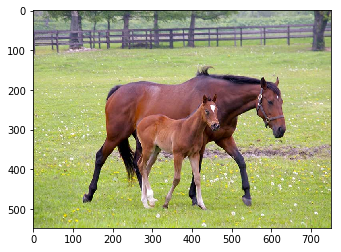

(300, 300, 3)
img shape: (300, 300, 3)
check box:  34928
min box x 0.6041009
max box x 0.6632044
min box x 0.34461972
max box x 0.49389634
min box x 0.7572012
max box x 0.88276273
min box x -0.09692052
max box x 0.8318001
min box x -0.03395202
max box x 0.7238162
no box
./horse/sample_horse.jpg


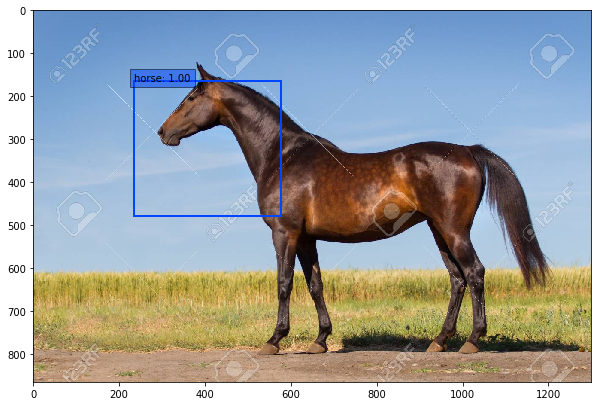

(300, 300, 3)
img shape: (300, 300, 3)
check box:  34928
min box x 0.023633625
max box x 1.0884397
no box
min box x 0.2748968
max box x 1.0884397
min box x -0.1414627
max box x 0.8181391
no box
min box x 0.16427118
max box x 0.60871947
./horse/20101210_an01_012.jpg


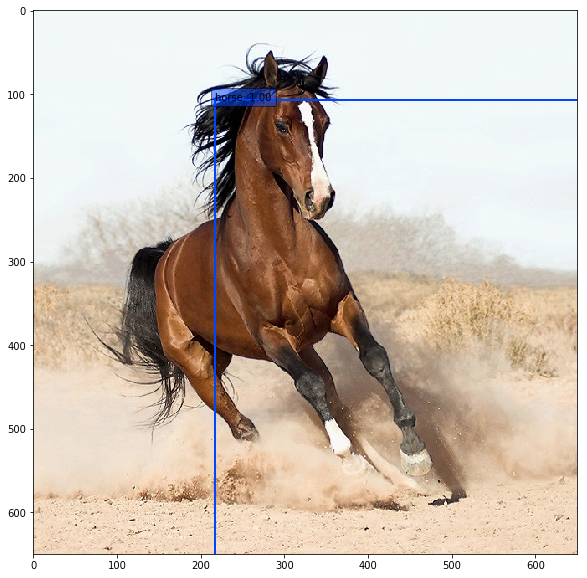

(300, 300, 3)
img shape: (300, 300, 3)
check box:  34928
no box
no box
min box x 0.17570797
max box x 0.87542534
min box x 0.2897811
max box x 0.81590164
./horse/pic_1.jpg


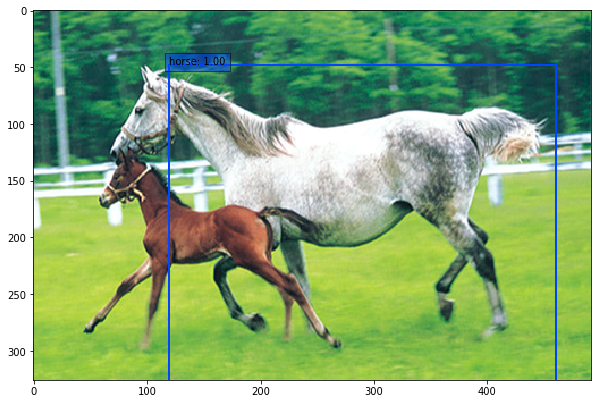

(300, 300, 3)
img shape: (300, 300, 3)
check box:  34928
min box x 0.6601011
max box x 0.86414236
no box
min box x -0.14674988
max box x 0.9237725
min box x 0.07910679
max box x 0.8316487
./horse/horses-14148.jpg


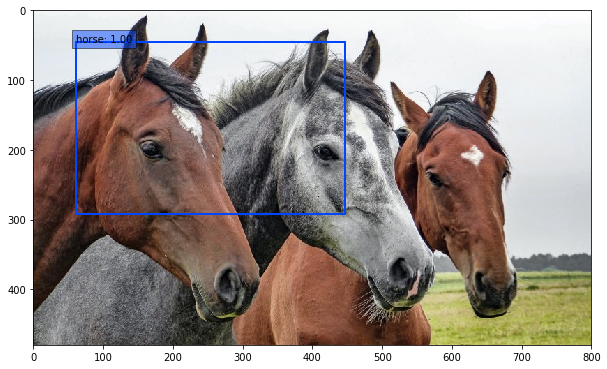

(300, 300, 3)
img shape: (300, 300, 3)
check box:  34928
no box
min box x 0.035511836
max box x 1.0914147
min box x 0.10395806
max box x 0.35548615
./horse/heritage_046_main1.jpg


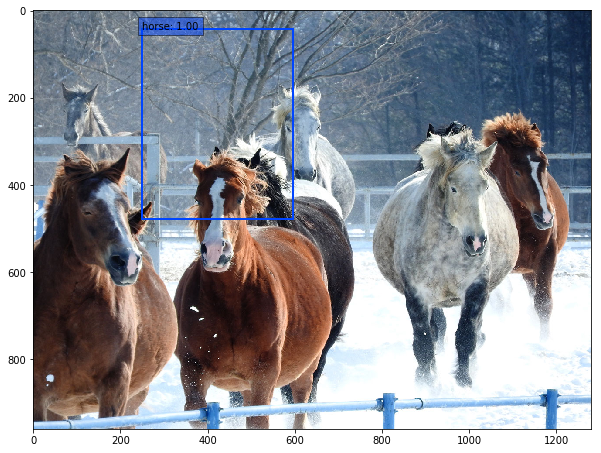

(300, 300, 3)
img shape: (300, 300, 3)
check box:  34928
min box x 0.31008697
max box x 0.406712
min box x 0.222973
max box x 0.97245234
no box
min box x 0.45821956
max box x 1.0232571
min box x 0.63265896
max box x 0.8736559
min box x 0.39995992
max box x 0.73065805
min box x -0.05715099
max box x 1.1759739
min box x -0.0141341705
max box x 0.818731
min box x 0.19600812
max box x 0.57882863
./horse/images.jpg


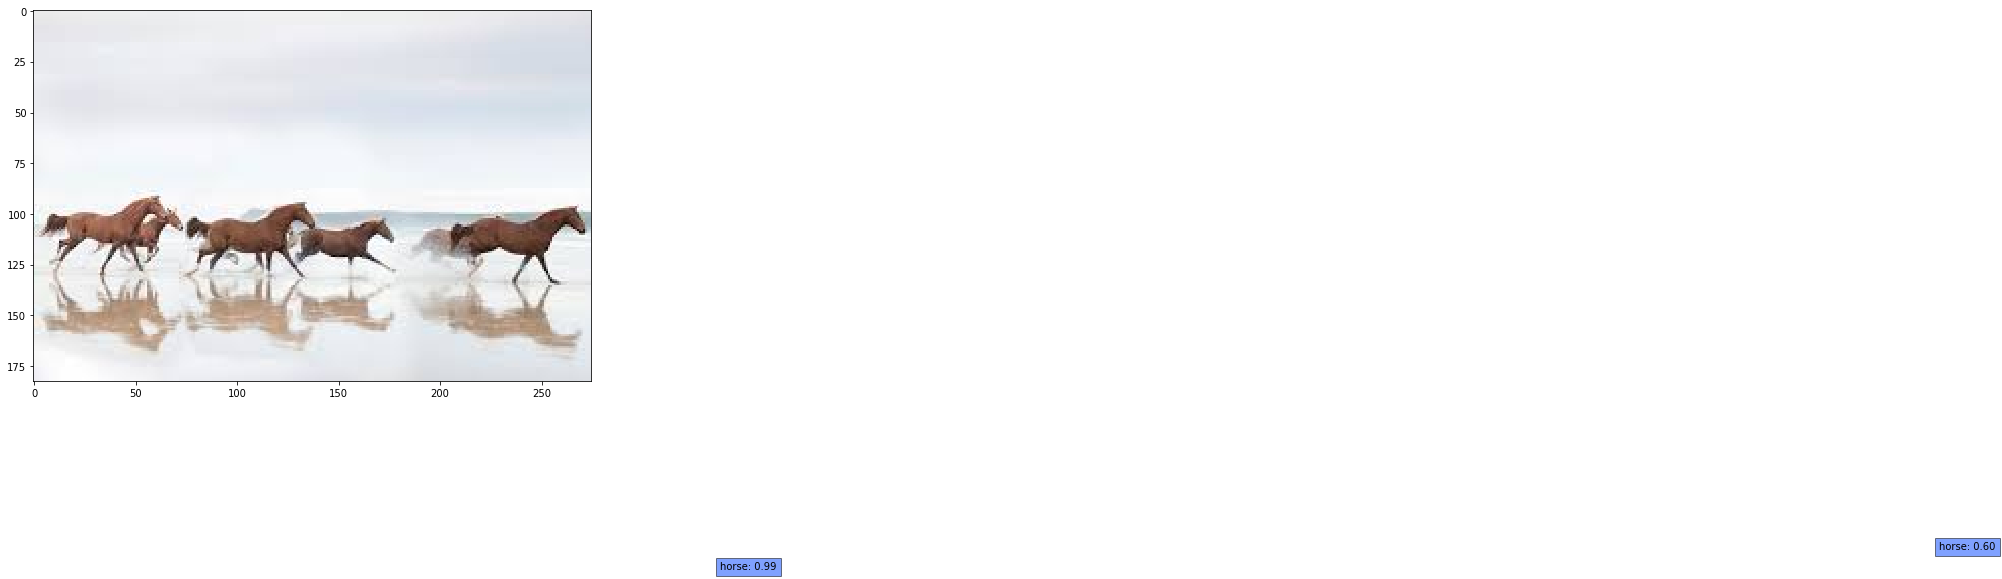

(300, 300, 3)
img shape: (300, 300, 3)
check box:  34928
min box x 0.3448441
max box x 0.62302893
min box x 0.3448441
max box x 0.62302893
min box x 0.34998947
max box x 0.62302893
min box x -0.08579654
max box x 1.1221892
./horse/sample.JPG


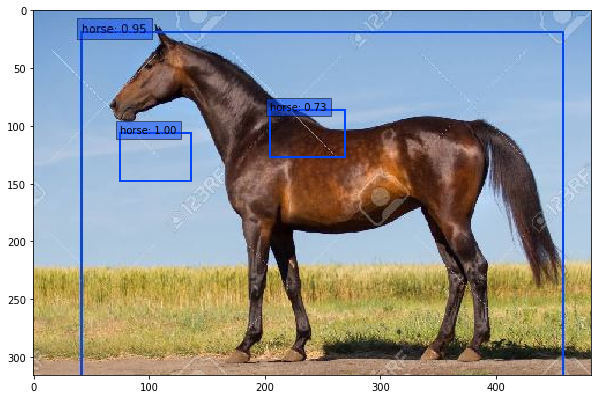

(300, 300, 3)
img shape: (300, 300, 3)
check box:  34928
min box x -0.026425421
max box x 0.90631187
no box
min box x 0.17212228
max box x 0.56919986


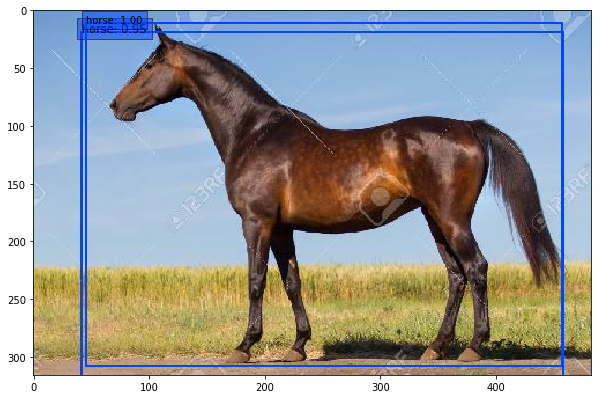

In [3]:
# 1. 画像読み込み
#image_file_path = "../../VOCdevkit/VOC2007/JPEGImages/009961.jpg"
image_file_path = "./horse/*"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import glob

# for TTA
from utils.ssd import Detect_Flip
Det = Detect_Flip(TTA=False)
Det = Det.to(device).eval()

# for vis
from utils.ssd_predict_show import SSDPredictShowFlip
ssd = SSDPredictShowFlip(eval_categories=voc_classes, net=net, device=device, TTA=False, softnms=True).to(device)

for imp in glob.glob(image_file_path):
    print(imp)
    img = cv2.imread(imp)  # [高さ][幅][色BGR]
    height, width, channels = img.shape  # 画像のサイズを取得

    # 2. 元画像の表示
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    # 3. 前処理クラスの作成
    color_mean = (104, 117, 123)  # (BGR)の色の平均値
    input_size = 300  # 画像のinputサイズを300×300にする
    transform = DataTransform(input_size, color_mean)

    # 4. 前処理
    phase = "val"
    img_transformed, boxes, labels = transform(
        img, phase, "", "")  # アノテーションはないので、""にする
    img_flip = img_transformed[:, :, ::-1]
    print(img_transformed.shape)
    
    x = torch.from_numpy(img_transformed[:, :, (2, 1, 0)]).permute(2, 0, 1)
    x_flip = torch.from_numpy(img_flip[:, :, (2, 1, 0)]).permute(2, 0, 1)

    # 5. SSDで予測
    net.eval()  # ネットワークを推論モードへ
    x = x.unsqueeze(0)  # ミニバッチ化：torch.Size([1, 3, 300, 300])
    with torch.no_grad():
        detections = net(x.to(device))
    
    # 6. 反転した画像で推論
    x_flip = x_flip.unsqueeze(0)
    with torch.no_grad():
        detections_flip = net(x_flip.to(device))
    
    # detectionsは
    # locのサイズは、torch.Size([batch_num, 8732, 4])
    # confのサイズは、torch.Size([batch_num, 8732, 21])
    
    # 7. NMS等を実行し推論結果を得る
    #output = Det(detections[0], detections[1], detections_flip[0], detections_flip[1], detections[2].to(device))
    
    # 8. 結果を可視化！
    ssd.show(imp, data_confidence_level=0.5)

./imgs/24071_20180420GENE01.jpg
img shape: (300, 300, 3)
check box:  34928
min box x 0.76804525
max box x 0.85414827
min box x 0.2555361
max box x 0.80063623
min box x 0.6240189
max box x 0.7724425
min box x 0.34520608
max box x 0.6275505
min box x -0.09741515
max box x 0.96289134
min box x 0.20410588
max box x 0.33395886


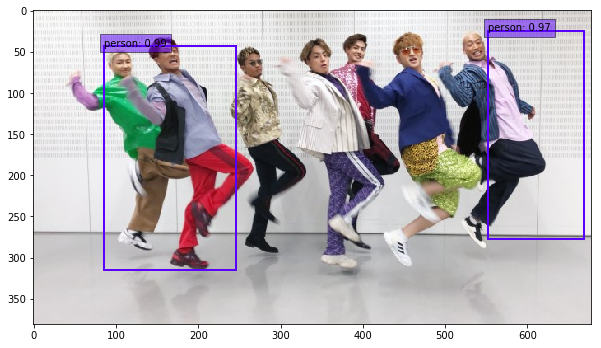

./imgs/sample2.JPG
img shape: (300, 300, 3)
check box:  34928
min box x 0.6920233
max box x 0.8919417
min box x 0.16779774
max box x 0.8324191
min box x 0.27897727
max box x 0.7824756
min box x 0.5748047
max box x 0.8240082
no box
min box x 0.20160711
max box x 0.7803857
min box x 0.23588726
max box x 0.62858343
min box x 0.2594515
max box x 0.6498202
min box x -0.0878862
max box x 0.8962535
min box x 0.21141104
max box x 0.33524278
min box x 0.20003349
max box x 0.8021644


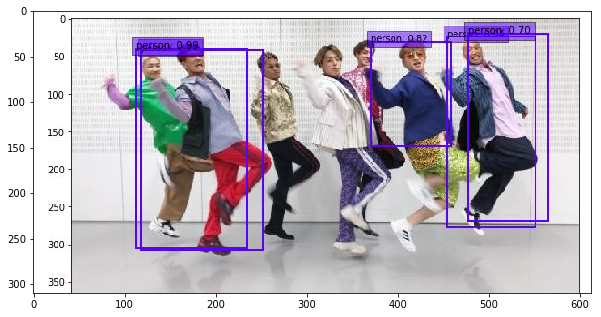

./imgs/a.jpg
img shape: (300, 300, 3)
check box:  34928
no box
min box x 0.0036798827
max box x 0.7889419
min box x 0.8181102
max box x 1.1875731
min box x -0.009939998
max box x 1.0706335
min box x -0.09061486
max box x 1.1455567


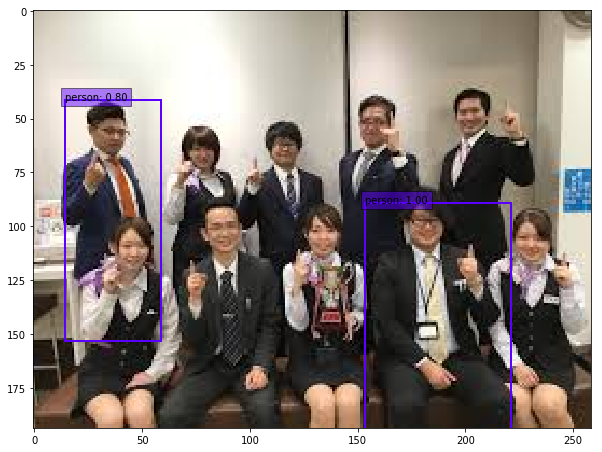

./imgs/syuugou01.jpg
img shape: (300, 300, 3)
check box:  34928
min box x 0.5832638
max box x 0.6874268
no box
min box x -0.07130076
max box x 1.010689
min box x -0.08932373
max box x 1.0708237
no box
min box x -0.000626266
max box x 0.07689261


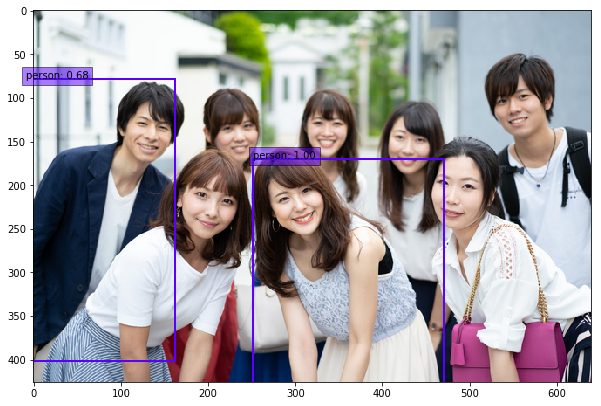

./imgs/EZ6I1552_-720x480.jpg
img shape: (300, 300, 3)
check box:  34928
min box x 0.008269817
max box x 0.7394289
min box x 0.41582483
max box x 0.48903692
min box x 0.09497762
max box x 0.53515303
min box x -0.005127728
max box x 0.15312433
min box x -0.09458283
max box x 1.1734641
min box x 0.0005982183
max box x 0.08133541
no box


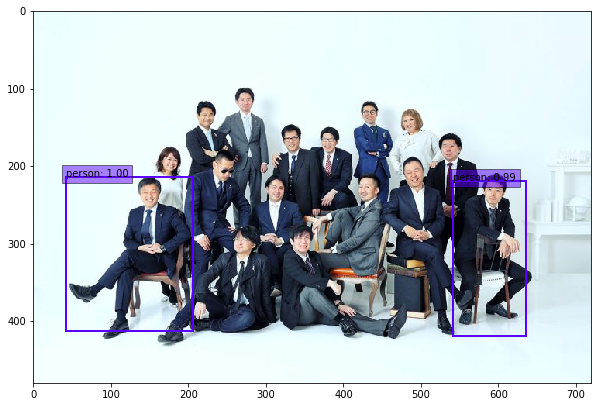

./imgs/main.jpg
img shape: (300, 300, 3)
check box:  34928
no box
min box x 0.041404184
max box x 0.15285878
min box x 0.2358712
max box x 0.8850632
min box x 0.06783091
max box x 0.97124326
no box
min box x 0.1720169
max box x 0.99111813
min box x 0.7765012
max box x 0.93910563
min box x 0.52330357
max box x 0.684715
min box x -0.0630302
max box x 1.1729655
min box x 0.5663847
max box x 0.77376807
no box


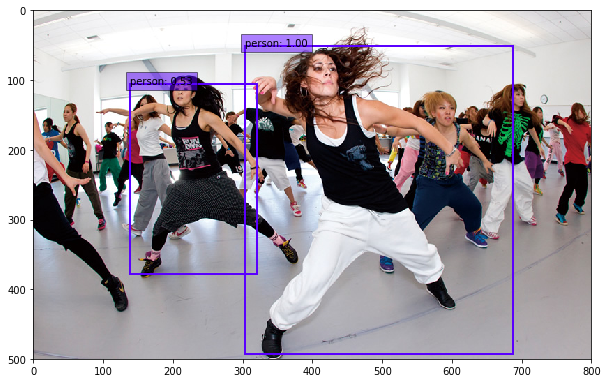

./imgs/b.jpg
img shape: (300, 300, 3)
check box:  34928
min box x 0.18530214
max box x 0.884272
min box x 0.054938436
max box x 0.20871484
min box x 0.30435914
max box x 0.43477535
min box x -0.07703352
max box x 1.0487679


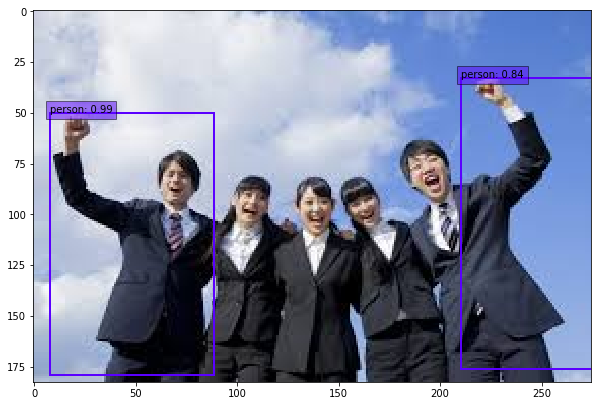

./imgs/img_2cff4a19be74dcd1bc1d54855bd3ec4d207066.jpg
img shape: (300, 300, 3)
check box:  34928
no box
min box x 0.036099527
max box x 0.89205545
min box x -0.12429042
max box x 0.3478166
no box
min box x 0.6215884
max box x 0.8284634
min box x -0.02010738
max box x 0.94366723
no box
min box x -0.02448069
max box x 1.1609535
min box x 0.81003416
max box x 1.047734


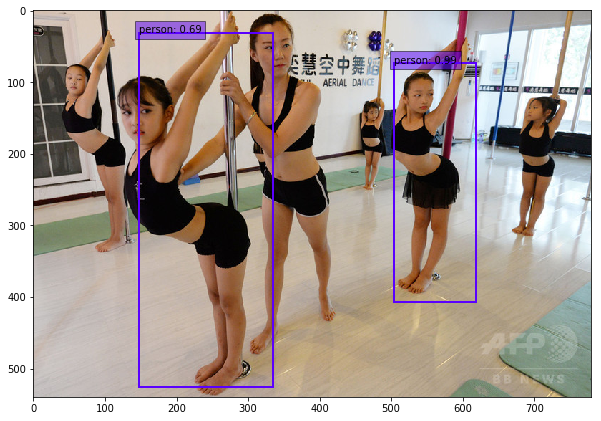

./imgs/TWICE35.jpg
img shape: (300, 300, 3)
check box:  34928
min box x 0.3054002
max box x 0.84794784
min box x 0.33154494
max box x 0.97170854
min box x 0.64954484
max box x 0.8380782
min box x -0.01578724
max box x 0.9760548
min box x 0.34221545
max box x 0.9587041
min box x 0.019528292
max box x 0.24429166
min box x -0.08550079
max box x 1.1738352
min box x 0.01711335
max box x 0.7755421


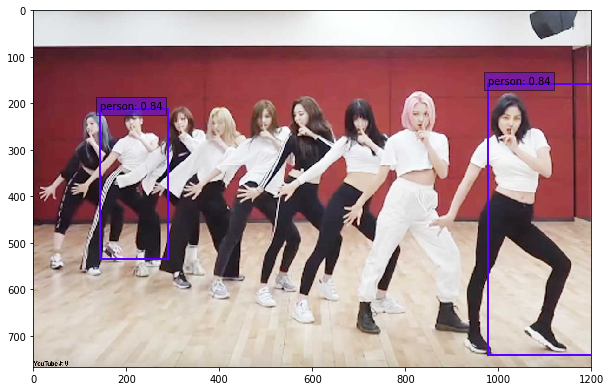

./imgs/AS20190821003362_commL.jpg
img shape: (300, 300, 3)
check box:  34928
min box x 0.12524772
max box x 0.8852538
min box x 0.17476761
max box x 0.6864437
min box x 0.5622677
max box x 0.8326394
min box x -0.10206195
max box x 1.0223734


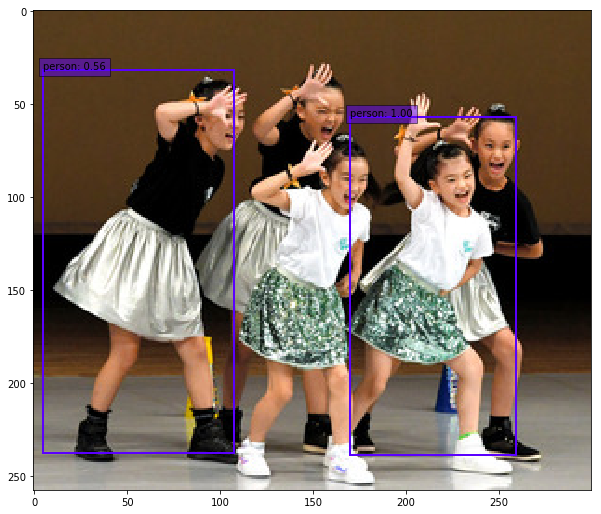

./imgs/1.png
img shape: (300, 300, 3)
check box:  34928
no box
min box x 0.0013252199
max box x 0.99144477
min box x 0.5626584
max box x 1.0283635
min box x 0.0013252199
max box x 0.99144477
min box x 0.20194967
max box x 0.94780797
min box x -0.0044379383
max box x 1.0053097
no box
min box x -0.017433941
max box x 0.99144477
min box x 0.0013252199
max box x 0.99144477


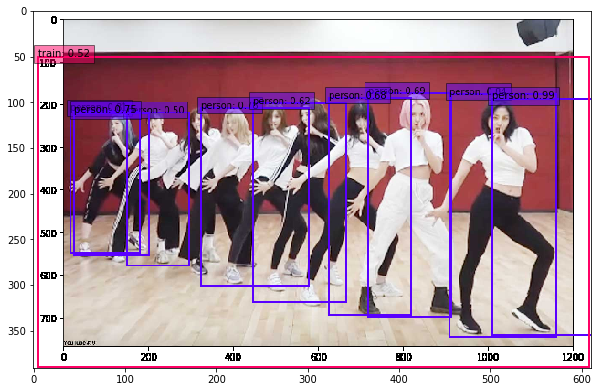

In [4]:
image_file_path = "./imgs/*"
for imp in glob.glob(image_file_path):
    print(imp)
    img = cv2.imread(imp)  # [高さ][幅][色BGR]
    height, width, channels = img.shape  # 画像のサイズを取得
    
    ssd.show(imp, data_confidence_level=0.5)
    plt.show()